In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv("C:\\Users\\lokes\\Music\\AusApparalSales4thQrt2020.csv")

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [59]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [60]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [63]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [65]:
df['State'].unique()

array([' WA', ' NT', ' SA', ' VIC', ' QLD', ' NSW', ' TAS'], dtype=object)

In [69]:
df['Group'].unique

<bound method Series.unique of 0           Kids
1            Men
2          Women
3        Seniors
4           Kids
          ...   
7555     Seniors
7556        Kids
7557         Men
7558       Women
7559     Seniors
Name: Group, Length: 7560, dtype: object>

In [71]:
df['Time'].unique()

array([' Morning', ' Afternoon', ' Evening'], dtype=object)

In [73]:
df

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


In [75]:
dc=df.copy()

In [77]:
dc['Sales']=(dc['Sales']-dc['Sales'].mean())/dc['Sales'].std()
dc['Unit']=(dc['Unit']-dc['Unit'].mean())/dc['Unit'].std()

In [79]:
dc

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,-0.775530,-0.775530
1,1-Oct-2020,Morning,WA,Men,-0.775530,-0.775530
2,1-Oct-2020,Morning,WA,Women,-1.085574,-1.085574
3,1-Oct-2020,Morning,WA,Seniors,-0.232953,-0.232953
4,1-Oct-2020,Afternoon,WA,Kids,-1.163085,-1.163085
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,-0.310464,-0.310464
7556,30-Dec-2020,Evening,TAS,Kids,-0.232953,-0.232953
7557,30-Dec-2020,Evening,TAS,Men,-0.232953,-0.232953
7558,30-Dec-2020,Evening,TAS,Women,-0.542997,-0.542997


In [81]:
df.groupby(['State','Group']).sum(['Sales'])

Unit     Sales
State Group                   
NSW   Kids      7435  18587500
      Men       7609  19022500
      Seniors   7275  18187500
      Women     7669  19172500
NT    Kids      2280   5700000
      Men       2305   5762500
      Seniors   2186   5465000
      Women     2261   5652500
QLD   Kids      3404   8510000
      Men       3357   8392500
      Seniors   3276   8190000
      Women     3330   8325000
SA    Kids      5806  14515000
      Men       5862  14655000
      Seniors   5887  14717500
      Women     5988  14970000
TAS   Kids      2310   5775000
      Men       2303   5757500
      Seniors   2260   5650000
      Women     2231   5577500
VIC   Kids     10544  26360000
      Men      10563  26407500
      Seniors  10526  26315000
      Women    10593  26482500
WA    Kids      2250   5625000
      Men       2301   5752500
      Seniors   2205   5512500
      Women     2105   5262500

In [87]:
df.groupby(['State']).sum(['Sales'])

,Unit,Sales
State,,
NSW,29988,74970000
NT,9032,22580000
QLD,13367,33417500
SA,23543,58857500
TAS,9104,22760000
VIC,42226,105565000
WA,8861,22152500


In [105]:
hss=df.groupby(['State']).sum('Sales').idxmax()
lss=df.groupby(['State']).sum('Sales').idxmin()
print("highest sales is -",hss)
print("lowest sales is -",lss)

highest sales is - Unit      VIC
Sales     VIC
dtype: object
lowest sales is - Unit      WA
Sales     WA
dtype: object


In [107]:
hsg=df.groupby(['Group']).sum('Sales').idxmax()
lsg=df.groupby(['Group']).sum('Sales').idxmin()
print("highest sale of group is -",hsg)
print("lowest sale of group is -",lsg)

highest sale of group is - Unit      Men
Sales     Men
dtype: object
lowest sale of group is - Unit      Seniors
Sales     Seniors
dtype: object


In [109]:
df.dtypes

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

In [115]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object

In [119]:
ws= df.resample('W',on='Date')['Sales'].sum()
print(ws)

Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    29622500
2020-12-13    31525000
2020-12-20    31655000
2020-12-27    31770000
2021-01-03    13792500
Freq: W-SUN, Name: Sales, dtype: int64


In [123]:
ms=df.resample('ME',on='Date')['Sales'].sum()
print(ms)

Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: ME, Name: Sales, dtype: int64


In [125]:
ms.max()

135330000

In [129]:
qs=df.resample('QE',on='Date')['Sales'].sum()
print(qs)

Date
2020-12-31    340302500
Freq: QE-DEC, Name: Sales, dtype: int64


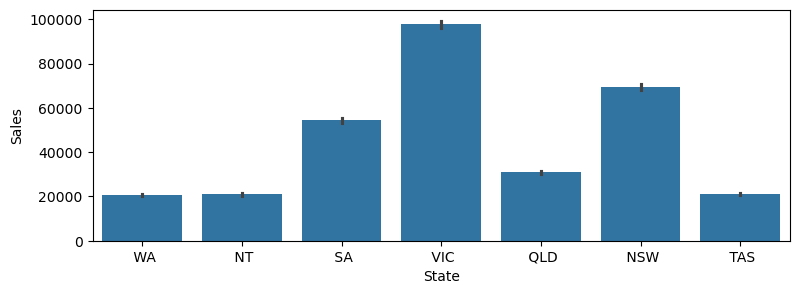

In [141]:
plt.figure(figsize=(9,3))
sns.barplot(x=df['State'],y=df['Sales'])
plt.show()

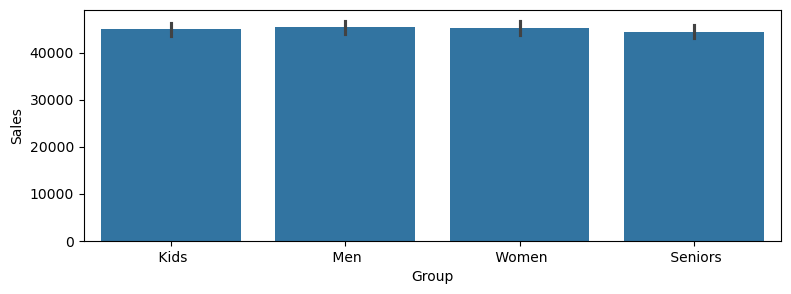

In [143]:
plt.figure(figsize=(9,3))
sns.barplot(x=df['Group'],y=df['Sales'])
plt.show()

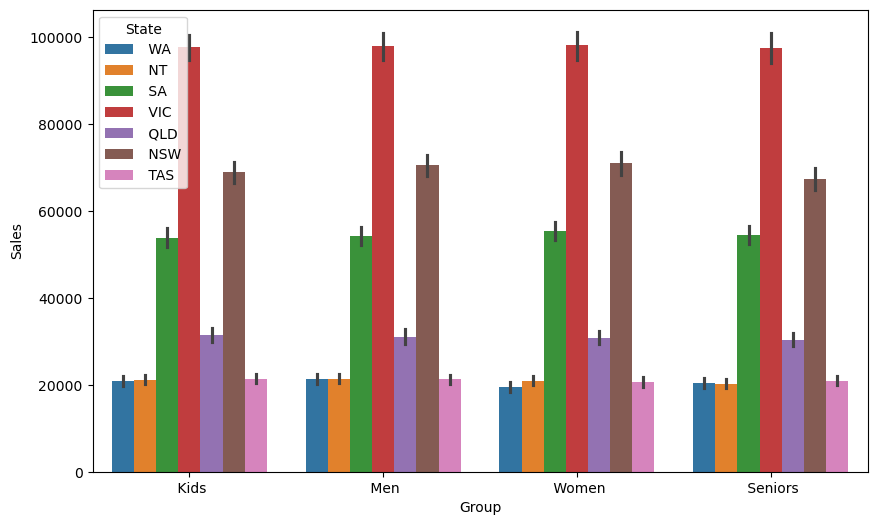

In [155]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Group'],y=df['Sales'],hue='State',data=data)
plt.show()

In [157]:
df

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


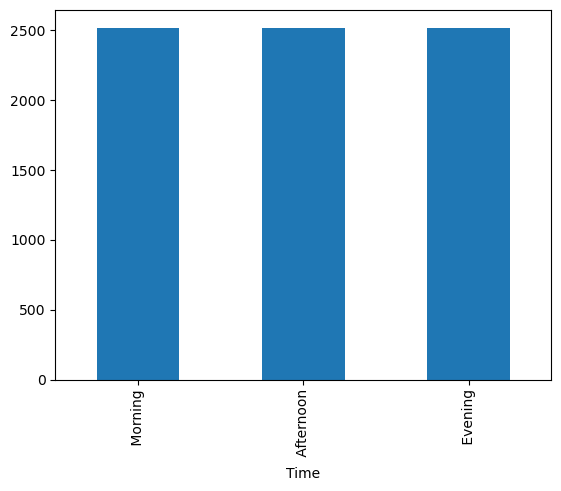

In [159]:
df['Time'].value_counts().plot(kind='bar')
plt.show()

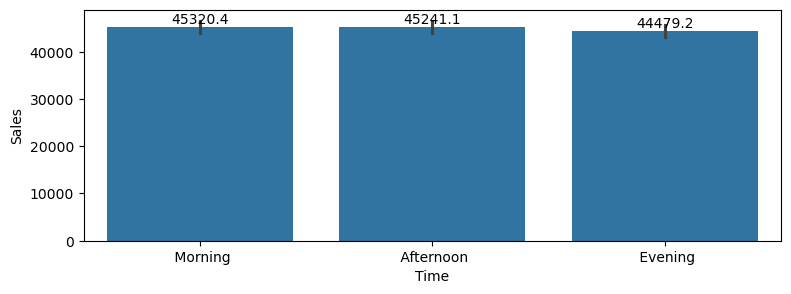

In [171]:
plt.figure(figsize=(9,3))
sx=sns.barplot(x=df['Time'],y=df['Sales'])
for  label in sx .containers:
    sx.bar_label(label)
plt.show()

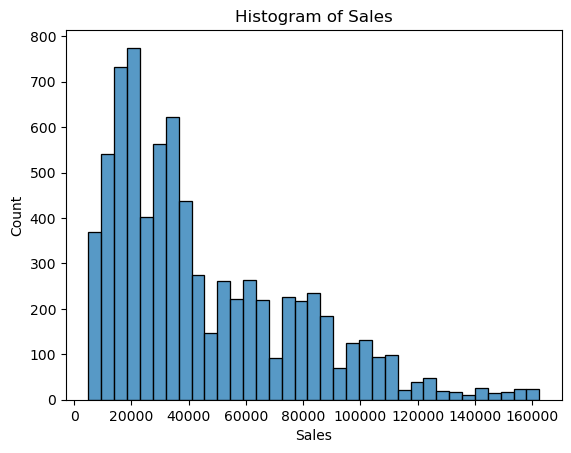

In [177]:
sns.histplot(x=df['Sales'])
plt.title('Histogram of Sales')
plt.show()

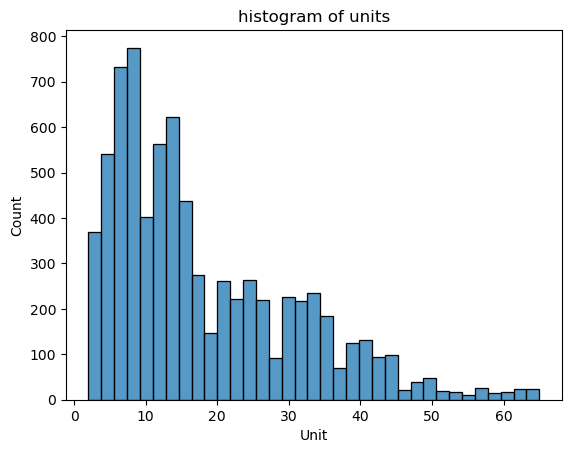

In [179]:
sns.histplot(x=df['Unit'])
plt.title('histogram of units')
plt.show()

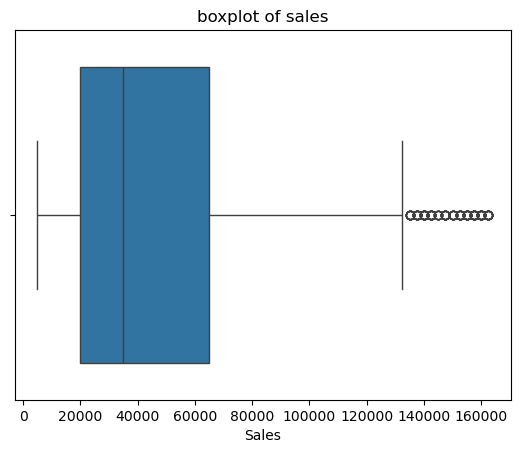

In [181]:
sns.boxplot(x=df['Sales'])
plt.title('boxplot of sales')
plt.show()

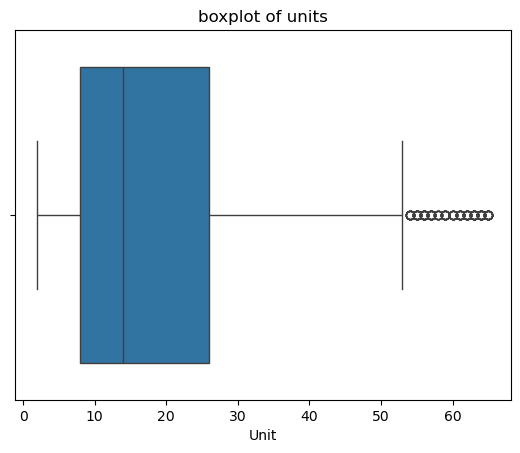

In [183]:
sns.boxplot(x=df['Unit'])
plt.title('boxplot of units')
plt.show()

C:\Users\lokes\AppData\Local\Temp\ipykernel_1624\3025739549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Sales'])


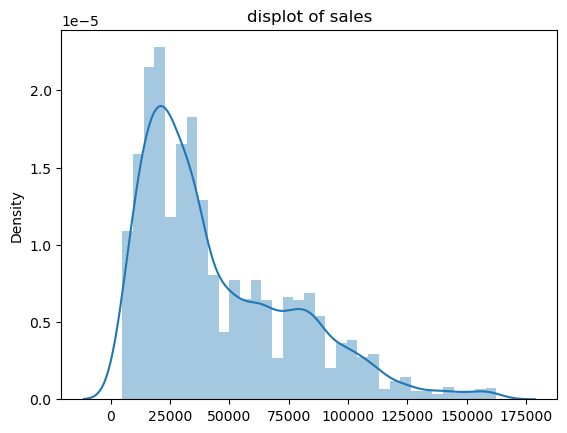

In [185]:
sns.distplot(x=df['Sales'])
plt.title('displot of sales')
plt.show()

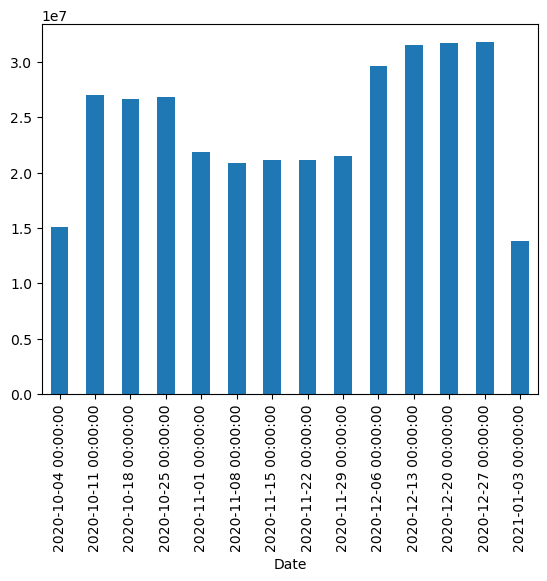

In [189]:
df.resample('W',on='Date')['Sales'].sum().plot(kind='bar')
plt.show()

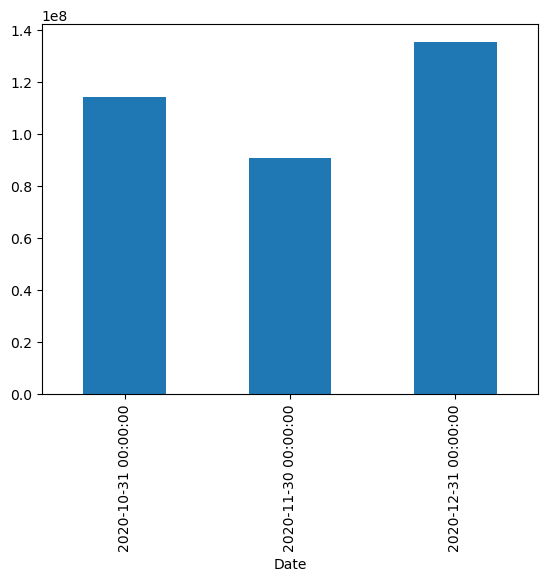

In [193]:
df.resample('ME',on='Date')['Sales'].sum().plot(kind='bar')
plt.show()